In [2]:
## importing necessary libraries

import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import t
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
import copy
import os
os.chdir("D:\Scaler_Masters\BusinessCases\Aerofit")

In [3]:
df = pd.read_csv('aerofit_treadmill.csv')

In [4]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [7]:
## Displaying the data type of each column present in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [8]:
## Displaying the number of rows and columns present in the dataset
df.shape

(180, 9)

In [10]:
## Checking for any missing values
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [72]:
df.describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_Bin
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000,180
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN,4
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN,Young-Adult
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN,110
mean,NaN,28.639014,NaN,15.572222,NaN,3.394569,3.311111,53476.813500,101.088889,NaN
std,NaN,6.441041,NaN,1.362017,NaN,0.948585,0.958869,15453.053359,43.364286,NaN
min,NaN,20.000000,NaN,14.000000,NaN,2.000000,1.000000,34107.157500,47.000000,NaN
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000,NaN
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000,NaN
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000,NaN


#### Observations

1. KP281 is the most frequent bought product
2. Percentage of male customer is higher is than female
3. Percentage of Young-Adults is higher than others
4. Percentage of Partnered customers is higher than single
5. Miles and Income have higher standard deviation which might contain outliers

In [76]:
### Distribution of Continuous Variables
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff


c_variables = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']

# Calculate number of rows and columns for subplots
n_rows = 3
n_cols = 2

# Create subplots
fig = make_subplots(rows=n_rows, cols=n_cols, subplot_titles=c_variables)

# Adding histograms with KDE in a loop
for i, c in enumerate(c_variables):
    row = (i // n_cols) + 1
    col = (i % n_cols) + 1

    # Adding histogram
    fig.add_trace(
        go.Histogram(x=df[c], nbinsx=20, histnorm='density', name=c, opacity=0.95),
        row=row, col=col
    )

    # Adding KDE line
    kde_x, kde_y = ff.create_distplot([df[c]], [c], show_hist=False)['data'][0]['x'], \
        ff.create_distplot([df[c]], [c], show_hist=False)['data'][0]['y']
    fig.add_trace(
        go.Scatter(x=kde_x, y=kde_y, mode='lines', name=f'KDE {c}'),
        row=row, col=col
    )

# Update layout
fig.update_layout(
    title="Histograms with KDE",
    height=1000, width=1200,
    showlegend=False
)

fig.show()

Detecting Outliers

In [33]:
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
c_variable = ['Age', 'Education', 'Usage', 'Income', 'Miles']

fig = make_subplots(
    rows=2, cols=3,
    subplot_titles=('Age', 'Education', 'Usage', 'Income', 'Miles')
)

# Creating subplots
for i,c in enumerate(c_variable):
    row = (i//3) +1
    col = (i % 3) + 1
    fig.add_trace(go.Box(y=df[c], name=c), row=row, col=col)
    fig.update_layout(
        height=600, width=1100,
        title_text="Box Plots of Different Variables",
        showlegend=False
    )

# Showing the plots
fig.show()



___Age, Usage, and Education___ have very few outliers than ___Income and Miles.___ 
Since removing them will account to loss of 10 percent of the data we will keep them for our analysis.


#### ___Finding if there is any relationship between the continuous variables and the output variable(Product) in the data.___

In [40]:
# Creating subplots for continuous variables

fig = make_subplots(
    rows=2, cols=3,
    subplot_titles=c_variable
)

for i, var in enumerate(c_variable):
    row = (i // 3) + 1
    col = (i % 3) + 1
    fig.add_trace(
        go.Scatter(
            x=df['Product'],
            y=df[var],
            mode='markers',
            marker=dict(color='blue')
        ),
        row=row, col=col
    )

# Update layout
fig.update_layout(
    height=600, width=1100,
    title_text="Scatter Plots of Continuous Variables vs Product",
    showlegend=False
)

# Show plots
fig.show()

#### ___Finding if there is any relationship between the categorical variables and the output variable(Product) in the data.___

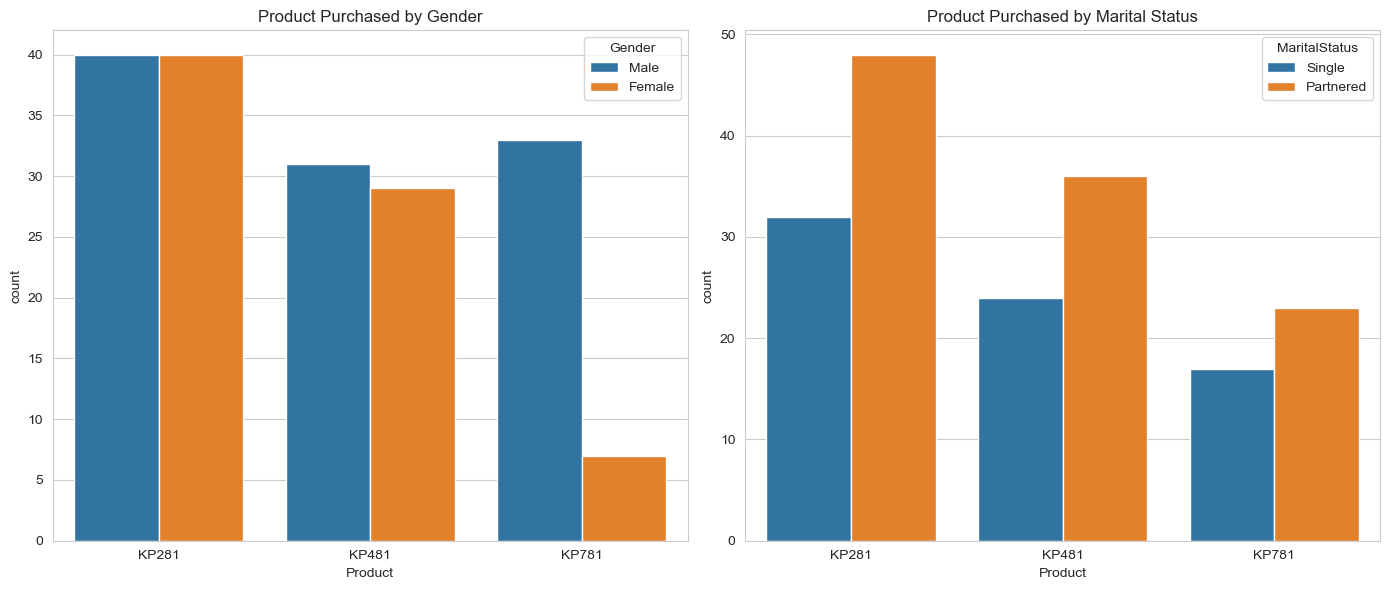

In [38]:
# Using seaborn for count plots
plt.figure(figsize=(14, 6))

# Gender vs Product
plt.subplot(1, 2, 1)
sns.countplot(x='Product', hue='Gender', data=df)
plt.title('Product Purchased by Gender')

# MaritalStatus vs Product
plt.subplot(1, 2, 2)
sns.countplot(x='Product', hue='MaritalStatus', data=df)
plt.title('Product Purchased by Marital Status')

plt.tight_layout()
plt.show()

### _Representing the probability_

In [81]:
pd_counts = pd.crosstab(index=df['Product'], columns='Count')
total_customer = len(df['Product'])
pd_counts['Marginal_Probability'] = pd_counts['Count'] / total_customer * 100
pd_counts

col_0,Count,Marginal_Probability
Product,,
KP281,80,44.444444
KP481,60,33.333333
KP781,40,22.222222


## ___Finding the probability that the customer buys a product based on each Gender.___

In [51]:
gender = pd.crosstab(df['Gender'], df['Product'], margins= 'ALL')
gender

Product,KP281,KP481,KP781,All
Gender,,,,
Female,40,29,7,76
Male,40,31,33,104
All,80,60,40,180


Computing Marginal Probability

In [53]:

genderProb = pd.crosstab(index = df['Gender'], columns = df['Product'], margins = True, normalize = True)
genderProb

Product,KP281,KP481,KP781,All
Gender,,,,
Female,0.222222,0.161111,0.038889,0.422222
Male,0.222222,0.172222,0.183333,0.577778
All,0.444444,0.333333,0.222222,1.000000


Computing Conditional Probability

In [54]:
pd.crosstab(index = df['Gender'], columns = df['Product'], normalize = "index")

Product,KP281,KP481,KP781
Gender,,,
Female,0.526316,0.381579,0.092105
Male,0.384615,0.298077,0.317308


___Probabilities of a customer buying each product given the customer is a male___

P(KP281|Male) = 38 %

P(KP481|Male) = 29 %

P(KP781|Male) = 31 %

---
___Probabilities of a customer buying each product given the customer is a female___

P(KP281|Female) = 52 %

P(KP481|Female) = 38 %

P(KP781|Female) = 9 %

--- 



## ___Finding the probability that the customer buys a product based on each Martial Status.___

In [82]:
pd.crosstab(df['MaritalStatus'], df['Product'], margins= 'ALL')


Product,KP281,KP481,KP781,All
MaritalStatus,,,,
Partnered,48,36,23,107
Single,32,24,17,73
All,80,60,40,180


Computing Marginal Probability

In [83]:
pd.crosstab(df['MaritalStatus'], df['Product'], margins= True, normalize= True)

Product,KP281,KP481,KP781,All
MaritalStatus,,,,
Partnered,0.266667,0.200000,0.127778,0.594444
Single,0.177778,0.133333,0.094444,0.405556
All,0.444444,0.333333,0.222222,1.000000


Computing Conditional Probability

In [84]:
pd.crosstab(df['MaritalStatus'], df['Product'], normalize= 'index')

Product,KP281,KP481,KP781
MaritalStatus,,,
Partnered,0.448598,0.336449,0.214953
Single,0.438356,0.328767,0.232877


___Probabilities of a customer buying each product given the customer is Partnered___

P(KP281|Partnered) = 44 %

P(KP481|Partnered) = 33 %

P(KP781|Partnered) = 21 %

---
___Probabilities of a customer buying each product given the customer is Single___

P(KP281|Partnered) = 43 %

P(KP481|Partnered) = 32 %

P(KP781|Partnered) = 23 %

--- 



## ___Finding the probability that the customer buys a product based on each Martial Status.___

In [85]:
def age_bin(x):
    if x<=20:
        return "Teen"
    elif 20 < x <= 30:
        return "Young-Adult"
    elif 30 < x <= 40:
        return "Adult"
    elif 40 < x <= 50:
        return "Middle-Age"

df['Age_Bin'] = df['Age'].apply(lambda x : age_bin(x))

Computing Marginal Probabilities


In [86]:
pd.crosstab(index=df['Age_Bin'], columns=df['Product'], margins= 'ALL')

Product,KP281,KP481,KP781,All
Age_Bin,,,,
Adult,19,23,6,48
Middle-Age,6,2,4,12
Teen,6,4,0,10
Young-Adult,49,31,30,110
All,80,60,40,180


In [87]:
pd.crosstab(index=df['Age_Bin'], columns=df['Product'], margins= True, normalize = True)

Product,KP281,KP481,KP781,All
Age_Bin,,,,
Adult,0.105556,0.127778,0.033333,0.266667
Middle-Age,0.033333,0.011111,0.022222,0.066667
Teen,0.033333,0.022222,0.000000,0.055556
Young-Adult,0.272222,0.172222,0.166667,0.611111
All,0.444444,0.333333,0.222222,1.000000


Computing Conditional Probabilities

In [88]:
pd.crosstab(index=df['Age_Bin'], columns=df['Product'], normalize = 'index')

Product,KP281,KP481,KP781
Age_Bin,,,
Adult,0.395833,0.479167,0.125000
Middle-Age,0.500000,0.166667,0.333333
Teen,0.600000,0.400000,0.000000
Young-Adult,0.445455,0.281818,0.272727


___Probabilities of a customer buying each product given the customer is Adult___

P(KP281|Adult) = 39 %

P(KP481|Adult) = 47 %

P(KP781|Adult) = 12 %


---
___Probabilities of a customer buying each product given the customer is Middle-Age___

P(KP281|Middle-Age) = 50 %

P(KP481|Middle-Age) = 16 %

P(KP781|Middle-Age) = 33 %

--- 
___Probabilities of a customer buying each product given the customer is Teen___

P(KP281|Teen) = 60 %

P(KP481|Teen) = 40 %

P(KP781|Teen) = 0 %

---
___Probabilities of a customer buying each product given the customer is Young-Adult___

P(KP281|Young-Adult) = 44 %

P(KP481|Young-Adult) = 28 %

P(KP781|Young-Adult) = 27 %



## Product Purchase Analysis

Multi-Variate Analysis

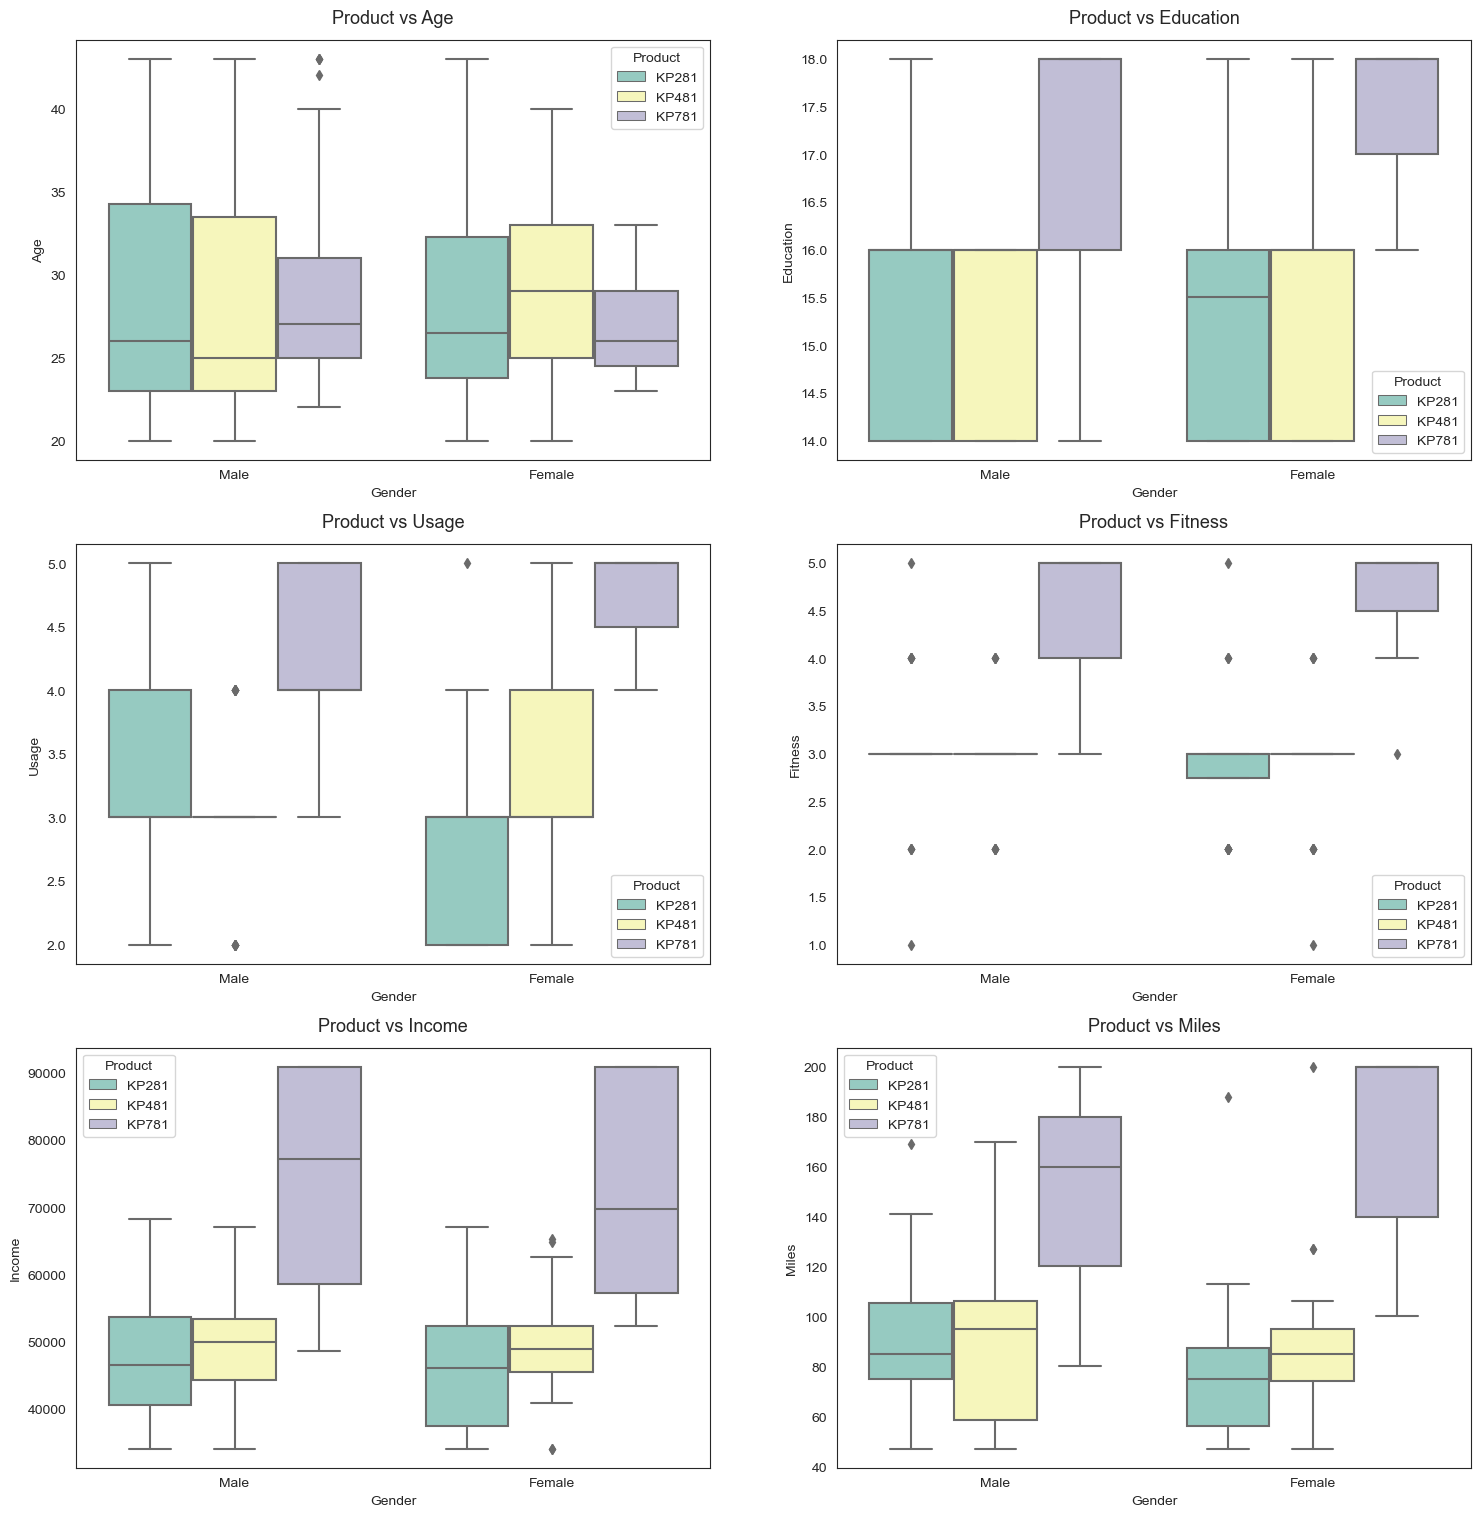

In [89]:
attributes = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
sns.set_style("white")
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(18, 12))
fig.subplots_adjust(top=1.3)
count = 0
for i in range(3):
    for j in range(2):
        sns.boxplot(data=df, x='Gender', y=attributes[count], hue='Product', ax=axs[i,j], palette='Set3')
        axs[i,j].set_title(f"Product vs {attributes[count]}", pad=12, fontsize=13)
        count += 1

Bi-Variate Analysis

In [124]:
# Average value of each continuous/numerical feature for each product
def average_by_product(df, features):
    result = {}
    for feature in features:
        result[feature] = df.groupby('Product')[feature].mean()
    return result

# List of features to analyze
features_to_analyze = ['Usage', 'Age', 'Education', 'Fitness', 'Income', 'Miles']

# Get average values
averages = average_by_product(df, features_to_analyze)

# Display the results
for feature, avg_values in averages.items():
    print(f"Average {feature} by Product:")
    print(avg_values)
    print('-' * 50)
    print()
    


Average Usage by Product:
Product
KP281    3.087500
KP481    3.066667
KP781    4.500562
Name: Usage, dtype: float64
--------------------------------------------------

Average Age by Product:
Product
KP281    28.425125
KP481    28.800083
KP781    28.825187
Name: Age, dtype: float64
--------------------------------------------------

Average Education by Product:
Product
KP281    15.125000
KP481    15.183333
KP781    17.050000
Name: Education, dtype: float64
--------------------------------------------------

Average Fitness by Product:
Product
KP281    2.9625
KP481    2.9000
KP781    4.6250
Name: Fitness, dtype: float64
--------------------------------------------------

Average Income by Product:
Product
KP281    46588.361812
KP481    49049.307875
KP781    73894.975312
Name: Income, dtype: float64
--------------------------------------------------

Average Miles by Product:
Product
KP281     83.125
KP481     88.500
KP781    155.900
Name: Miles, dtype: float64
-------------------------

Uni-variate Analysis


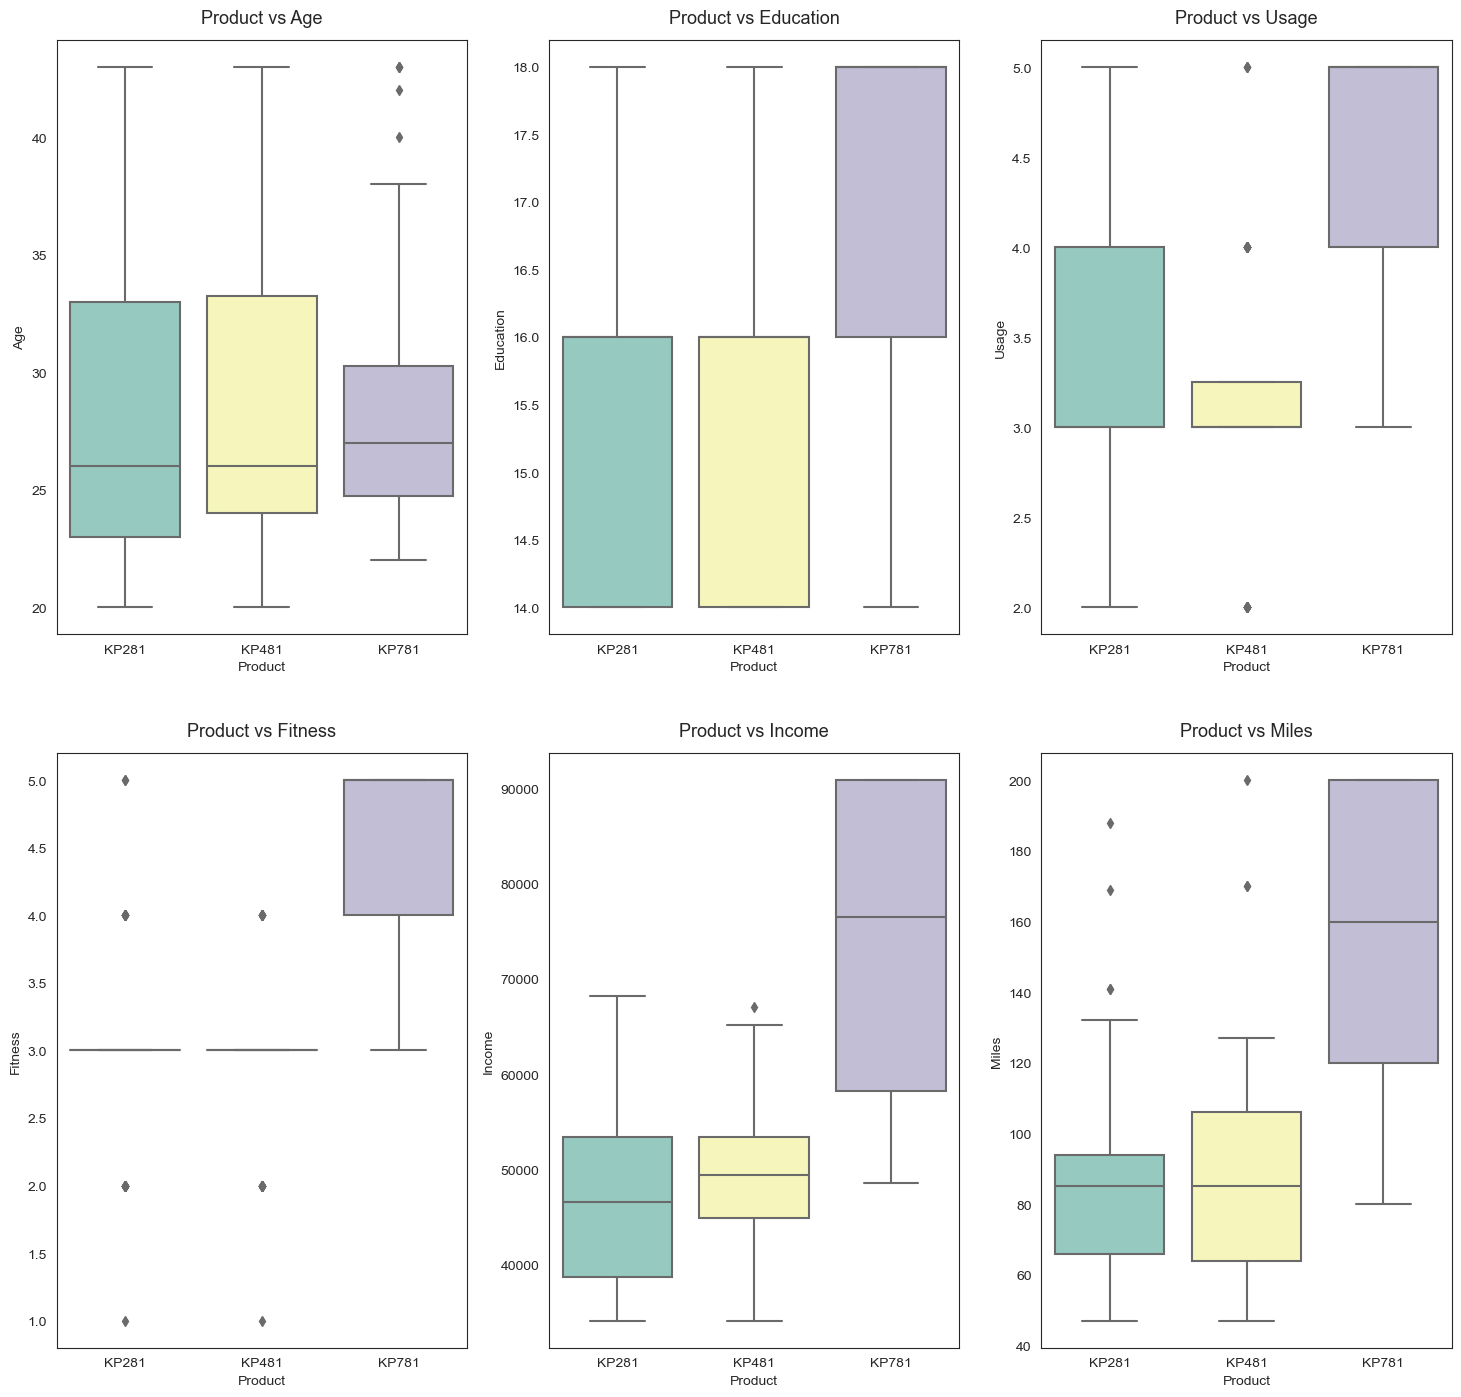

In [126]:
# List of attributes
attributes = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']

# Set style
sns.set_style("white")

# Create subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
fig.subplots_adjust(top=1.2)

# Add box plots to the subplots using enumerate
for count, attributes in enumerate(attributes):
    row = count // 3
    col = count % 3
    sns.boxplot(data=df, x='Product', y=attributes, ax=axs[row, col], palette='Set3')
    axs[row, col].set_title(f"Product vs {attributes}", pad=12, fontsize=13)

# Show the plot
plt.show()

#### ___Observations for Product Purchase Analysis___

___Product vs Age:___
- The median age of customers purchasing KP281 and KP481 products is similar, indicating no significant age difference between these customer groups.
- Customers aged between 25 and 30 show a higher likelihood of purchasing the KP781 product, suggesting a preference for this product among younger adults within this age range.

___Product vs Education:___
- Customers with an education level greater than 16 years are more likely to purchase the KP781 product. This trend implies that higher education levels may influence the preference for this particular product.
- Conversely, customers with an education level below 16 years have an equal probability of purchasing either the KP281 or KP481 product, indicating no strong preference between these two products within this education bracket.

___Product vs Usage:___

- Customers intending to use the treadmill more than 4 times a week are more inclined to purchase the KP781 product. This suggests that the KP781 may appeal more to individuals with higher fitness activity levels.
- Customers with a lower frequency of treadmill usage tend to purchase either the KP281 or KP481, showing a preference for these products among less frequent users.

___Product vs Fitness:___

- Customers with a fitness level of 3 or higher are more likely to purchase the KP781 product. This indicates a correlation between higher fitness levels and the preference for this specific product.

___Product vs Income:___

- Customers with an annual income of $60,000 or higher show a greater propensity to purchase the KP781 product. This trend suggests that higher-income customers are more likely to opt for this product, potentially due to its features or perceived value.

___Product vs Miles:___

- Customers who expect to walk or run more than 120 miles per week are more likely to purchase the KP781 product. This indicates that the KP781 is favored by customers with higher mileage expectations, suggesting suitability for more intensive use.

### Finding correlation between the given features in the data

#### Heatmaps

In [110]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Create a heatmap
fig = go.Figure(data=go.Heatmap(
    z=correlation_matrix.values,
    x=correlation_matrix.columns,
    y=correlation_matrix.index,
    colorscale='tropic',
    colorbar=dict(title="Correlation"),
    zmin=-1, zmax=1,
    hovertemplate='%{y} vs %{x}: %{z:.4f}<extra></extra>',
    text=correlation_matrix.values))

# Update layout for better readability
fig.update_layout(
    title='Correlation Matrix Heatmap',
    xaxis_nticks=36,
    yaxis_nticks=36,
    height=600,
    width=1000,
    margin=dict(l=50, r=50, t=50, b=50),
    xaxis=dict(tickangle=45),
    yaxis=dict(tickangle=0)
)

# Show the heatmap
fig.show()

#### PairPlots

In [112]:
# Selecting only numerical columns for pairplot
num_cols = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']

# Creating pairplot
fig = px.scatter_matrix(df, dimensions=num_cols, color='Product',
                        title="Pair Plot of Numerical Features colored by Product")

fig.update_traces(diagonal_visible=False)
fig.update_layout(height=1800, width=1800, title="Pair Plot of Numerical Features",
                  showlegend=False)

# Show plot
fig.show()

<Axes: xlabel='Miles', ylabel='Income'>

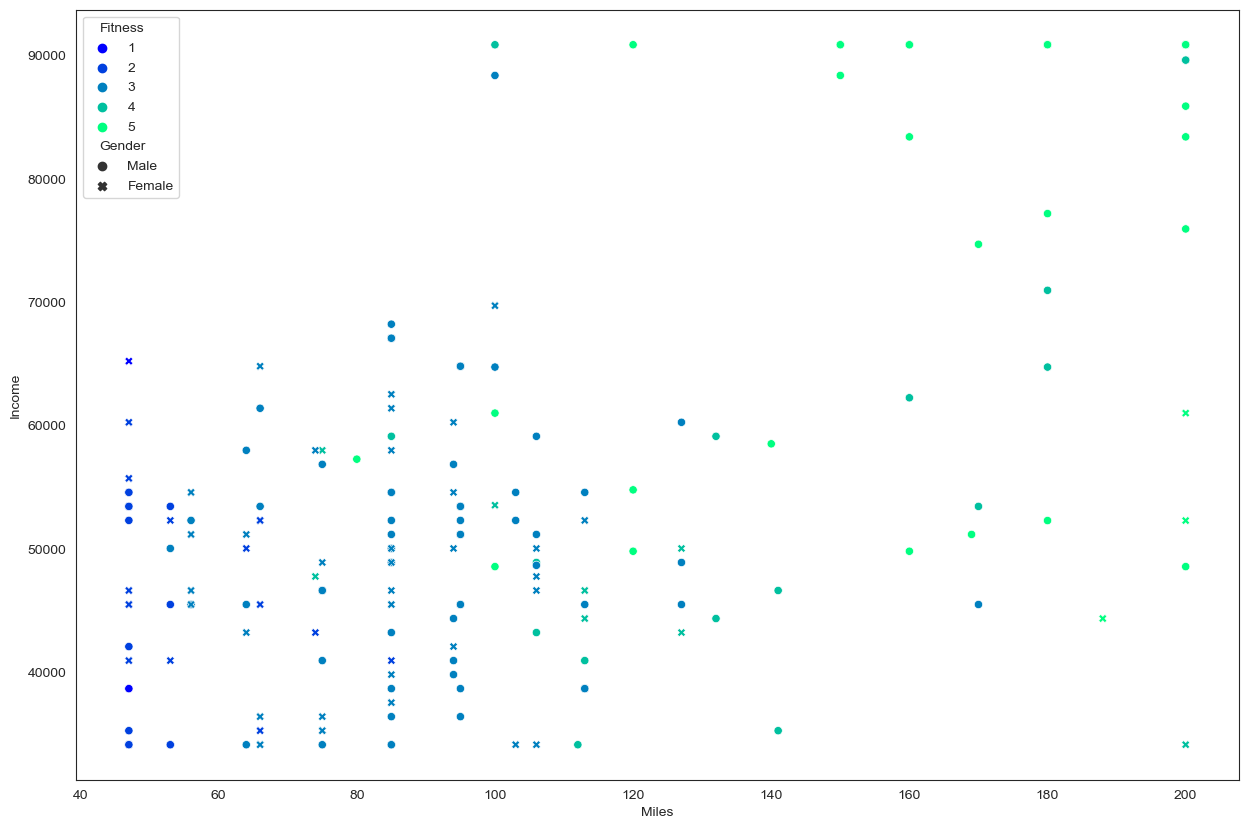

In [113]:
# Scatter Plot
plt.figure(figsize=(15,10))
sns.scatterplot(x='Miles',y='Income',data=df,hue='Fitness',style='Gender',palette='winter')

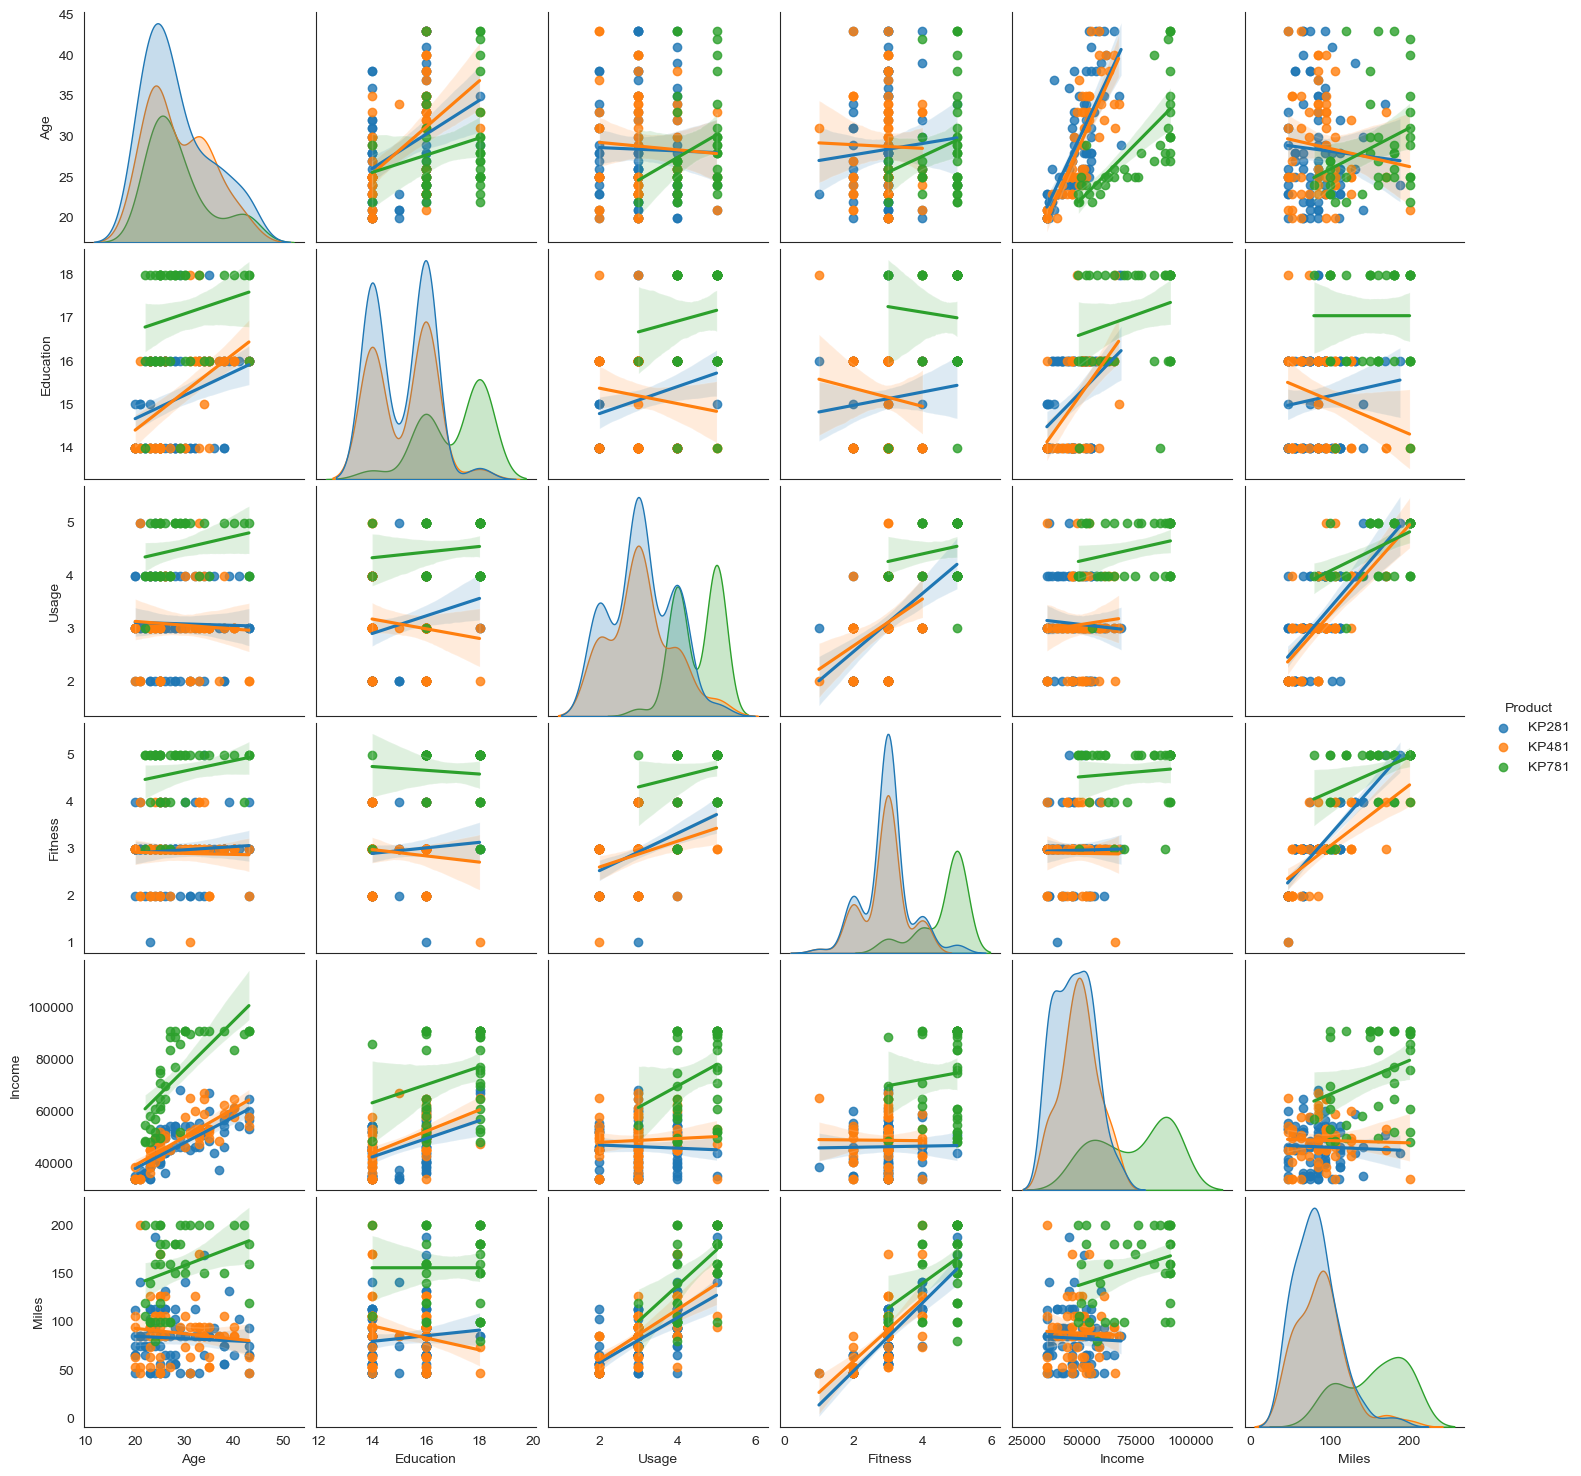

In [119]:
# Product Analysis - Pair Plot
sns.pairplot(df,hue='Product',kind='reg')
plt.show()

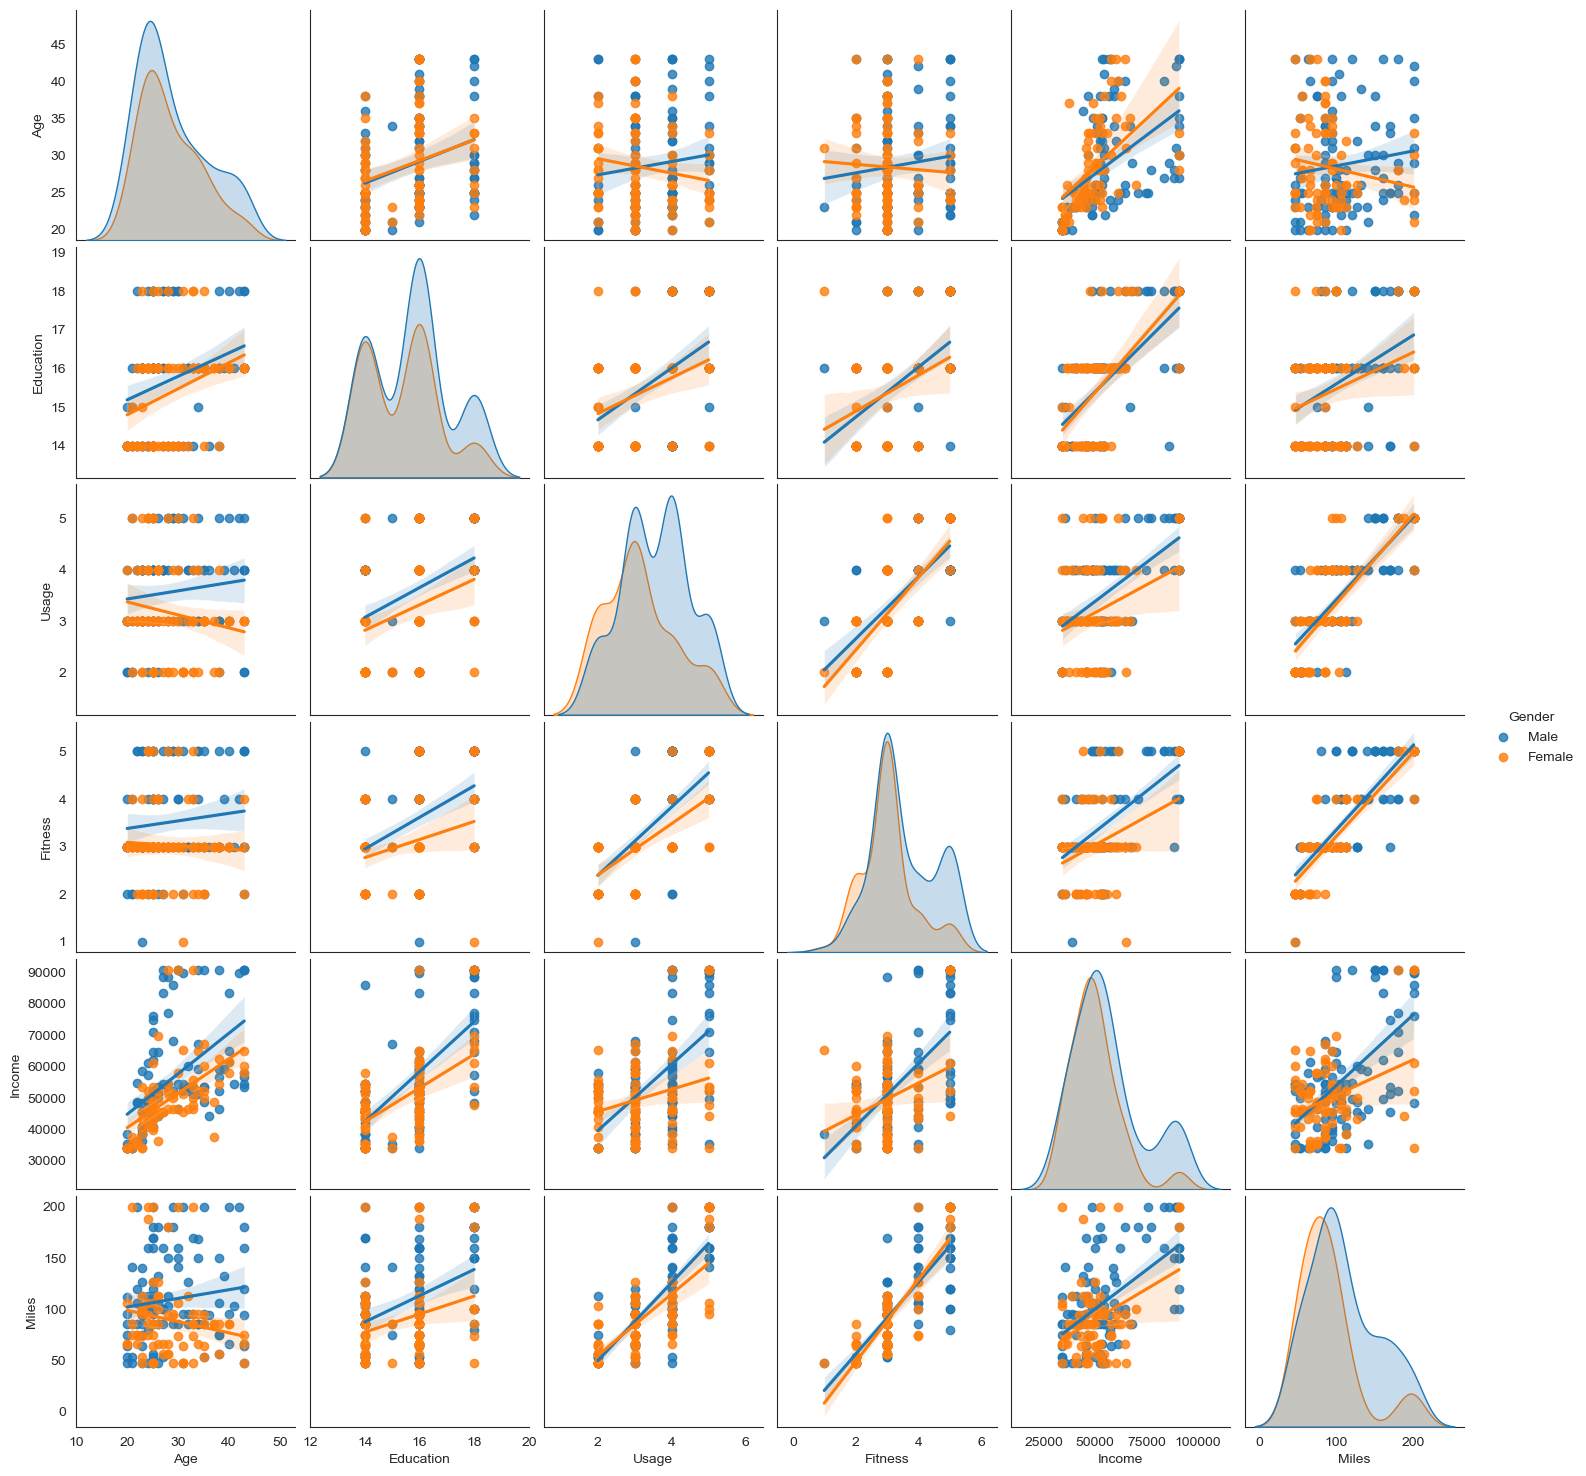

In [120]:
# Gender Analysis - Pair Plot
sns.pairplot(df,hue='Gender',kind='reg')
plt.show()

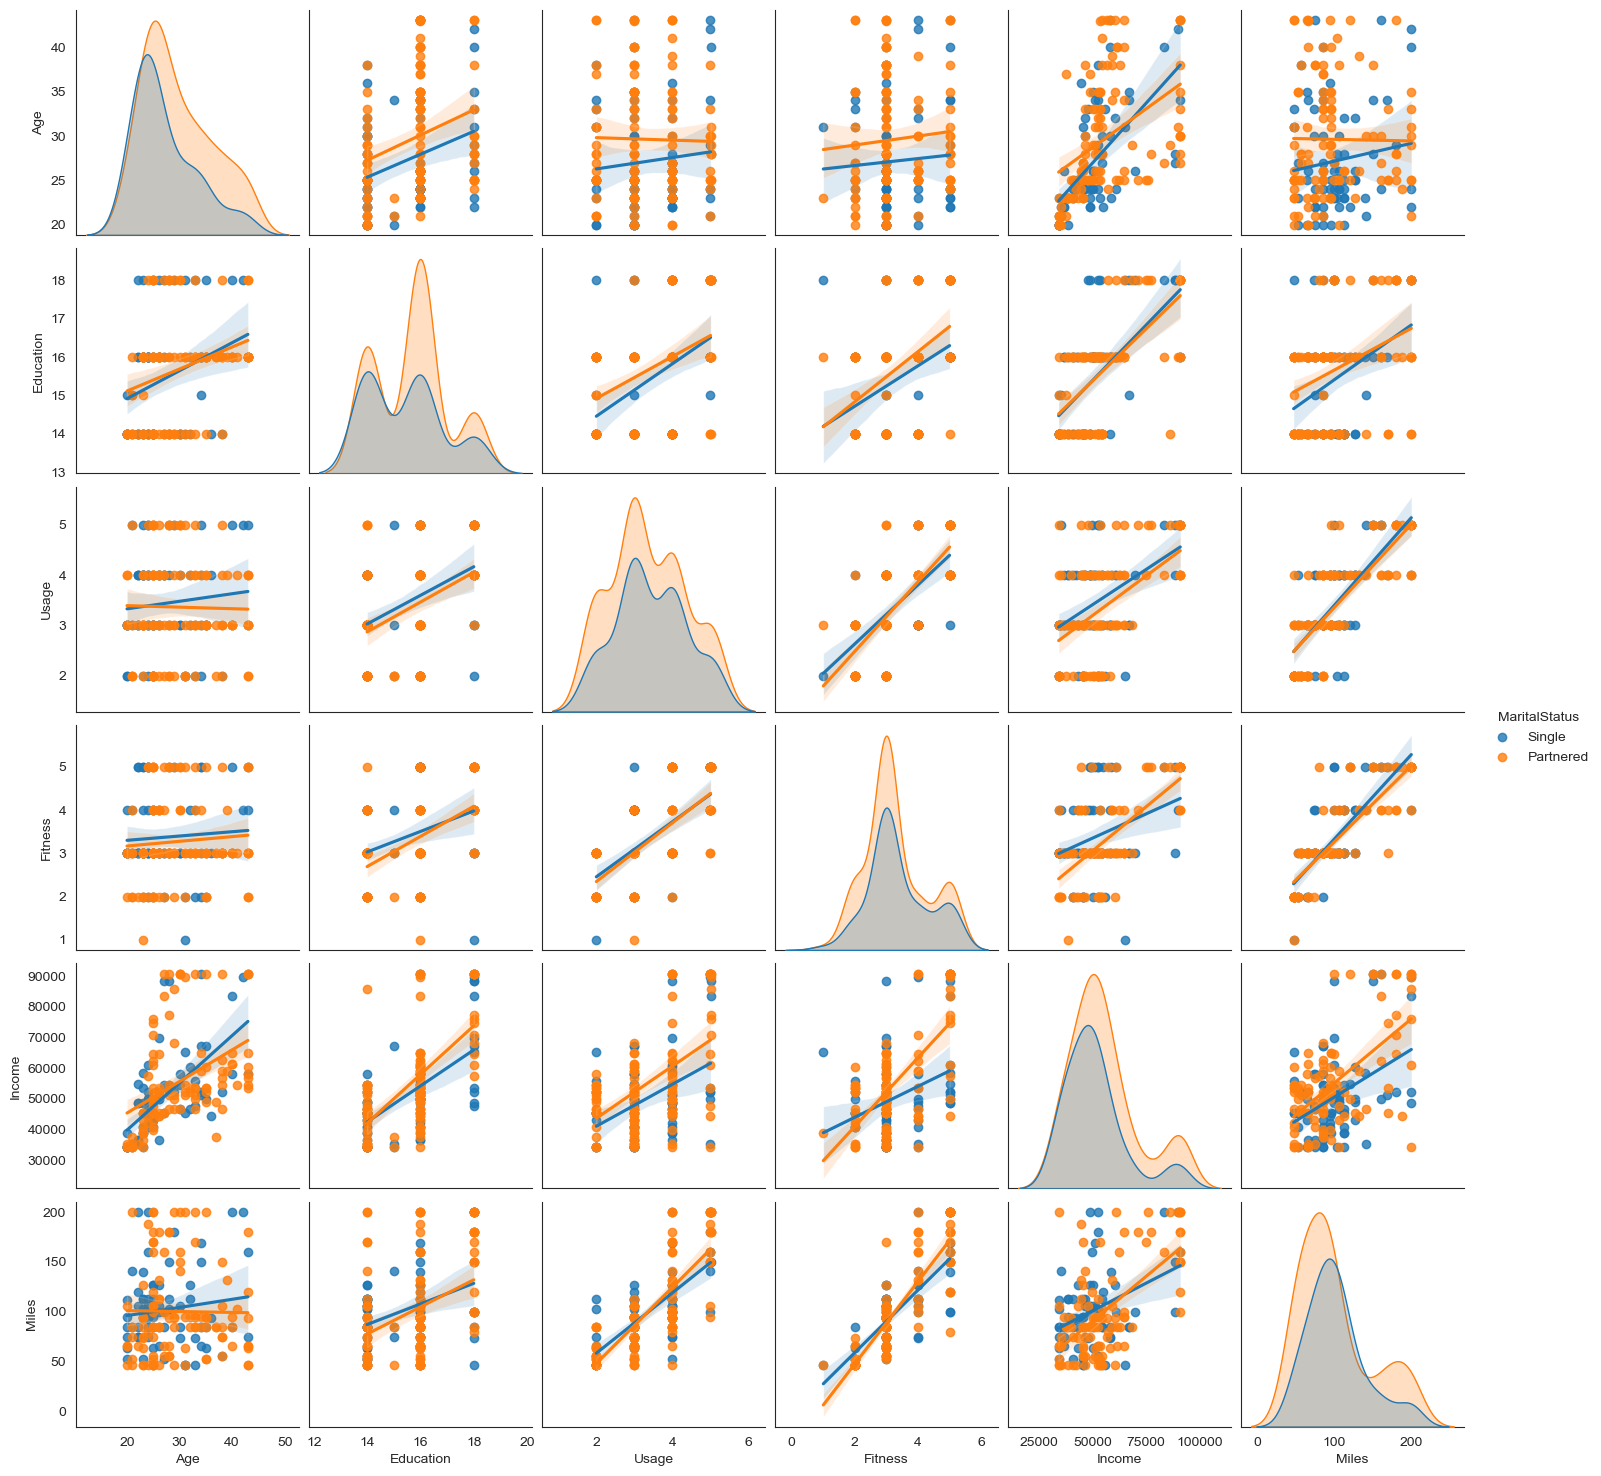

In [121]:
# Marital Status - pair plot
sns.pairplot(df,hue='MaritalStatus',kind='reg')
plt.show()

## ___Customer Profiling:___

---
#### KP281

___Product Overview:___
- KP281 is an easily affordable, entry-level treadmill and the best-selling product in its category.

___Customer Profile:___

- ___Popularity:___ It is the most popular choice among entry-level customers.

- ___Demographics:___ Equally popular among both male and female customers.

- ___Usage:___ Typically used 3 to 4 times a week.

- ___Distance:___ Average distance covered ranges from 70 to 90 miles per week.

- ___Fitness Level:___ Most users rate their fitness as average.

- ___Age Group:___ Preferred by a wide age range, from young adults to older beginners.

- ___Income:___ Commonly purchased by customers with an income between $39,000 and $53,000 annually.

- ___Marital Status:___ Single females and partnered males buy this product more than single males.

---

#### KP481

___Product Overview:___

- KP481 is an intermediate-level treadmill and the second most popular product among customers.

___Customer Profile:___

- ___Popularity:___ The second most popular product, appealing to a broad range of users.
- ___Fitness Level:___ Users range from those in poor to average shape.
- ___Usage:___ Typically used to cover more miles rather than for intense fitness routines.
- ___Distance:___ Average distance covered ranges from 70 to 130 miles per week.
- ___Demographics:___ More female customers prefer this product compared to males. It is particularly recommended for intermediate female users.
- ___Age Group:___ Favored by teenagers, adults, and middle-aged individuals.
- ___Income:___ Average income of customers is around $49,000 annually.

- ___Usage Frequency:___ Used on average 3 days per week.

- ___Marital Status:___ More popular among partnered customers. There is a slight male predominance in purchases.

- ___Distance:___ Typically used to travel between 75 to 100 miles weekly.

- ___Age Range:___ Customers are generally between 24 to 34 years old.

---

#### KP781

___Product Overview:___
- KP781 is a high-end, advanced treadmill, less frequently purchased due to its higher price point.

___Customer Profile:___

- ___Usage Purpose:___ Mainly used to cover more extensive distances.
- ___Fitness Level:___ Users generally rate their fitness as excellent.
- ___Distance:___ Customers walk/run an average of 120 to 200 miles or more per week.
- ___Usage Frequency:___ Used 4 to 5 times a week, at least.
- ___Demographics:___ Female customers who engage in extensive exercise (around 180 miles per week) prefer this product. The probability of male customers purchasing KP781 (31.73%) is significantly higher than for females (9.21%).
- ___Marital Status:___ Single individuals are more likely to purchase KP781 than partnered customers.
- ___Age Group:___ Preferred by middle-aged to older customers who seek to cover more distance. 
- ___Income:___ Buyers typically have an annual income exceeding $75000.
- ___Experience:___ Customers with more experience with previous Aerofit products are more likely to buy KP781.
- ___Corelation with Education and Income:___ This product is preferred where there is a high correlation between education level and income.







